# 動物標本を用いた局所冷却実験の解析

### 解析するデータ
データは20170924にnumpyデータが入っている
- 2005-04-16-1/S0025
- 2005-08-24-2/S0011
- 2006-02-18-1/S0011

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import cv2
%matplotlib inline

In [2]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap

## 解析の検討

### sobelフィルタでのエッジ検出

In [139]:
gray_sobelx = cv2.Sobel(cam[1000], cv2.CV_32F,1,0)
gray_sobely = cv2.Sobel(cam[1000], cv2.CV_32F,0,1)
gray_abs_sobelx = cv2.convertScaleAbs(gray_sobelx) 
gray_abs_sobely = cv2.convertScaleAbs(gray_sobely)
gray_sobel_edge = cv2.resize(cv2.addWeighted(gray_abs_sobelx,0.5,gray_abs_sobely,0.5,0), (128, 128))
gray_sobel_edge = gray_sobel_edge/np.max(gray_sobel_edge).astype(np.float)

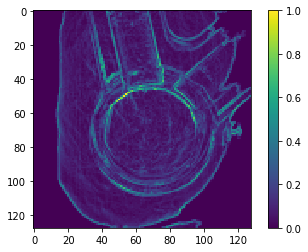

In [140]:
plt.imshow(gray_sobel_edge)
plt.colorbar()

### Cannyフィルタでのエッジ検出

In [170]:
threshold = 90
Canny = cv2.Canny(np.uint8(cam[1000]), threshold1=threshold, threshold2=threshold+10)
Canny = cv2.resize(Canny/np.max(Canny), (128, 128))

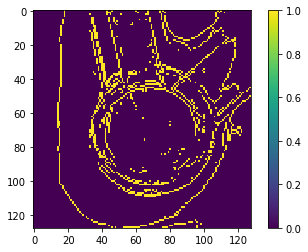

In [177]:
plt.imshow(Canny)
plt.colorbar()

### 旋回中心位置の検出
windowサイズが3のため，位相分散の閾値は0.4に設定

In [178]:
SW_center = (pvmap > 0.4) * 1

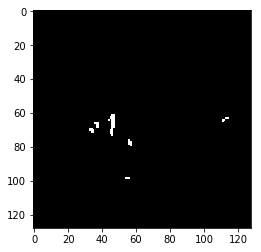

In [182]:
plt.imshow(SW_center[1000], cmap='gray')

### SW位置と冷却位置を合成

In [183]:
brend_ratio = 0.4
time = 1000
color_image = np.zeros((128, 128, 3))

color_image[:, :, 0] = SW_center[time] * (1-brend_ratio)
color_image[:, :, 1] = SW_center[time] * (1-brend_ratio)
color_image[:, :, 2] = Canny * brend_ratio + SW_center[time] * (1-brend_ratio)

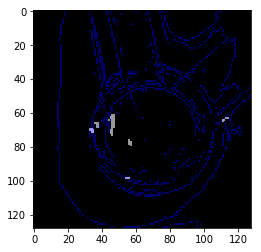

In [184]:
plt.imshow(color_image)

## 2005-04-16-1/S0025@の解析

In [3]:
cam_sample1 = RawCam(path='/mnt/recordings/ExperimentData/2005-04-16-1/C001S0025@/',
             cam_type='sa4',
             image_width=256, image_height=256,
             frame_start=0, frame_end=100)
cam_sample1.setIntROI(val_min=100)
vmem_sample1 = VmemMap(cam_sample1)
vmem_sample1.smooth(size=3)
pmap_sample1 = PhaseMap(vmem_sample1, shrink=2)
pvmap_sample1 = PhaseVarianceMap(pmap_sample1)

In [4]:
cam = np.load('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170924/2005-04-16-1/C001S0025@/cam.npy')
cam = cam/np.max(cam) * 255
pvmap = np.load('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170924/2005-04-16-1/C001S0025@/pvmap.npy')
SW_center = (pvmap > 0.4) * 255

In [5]:
brend_ratio = 0.4
save_dir = '/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170925/2005-04-16-1/C001S0025@/center/'
save_file = '/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170925/2005-04-16-1/C001S0025@/center/{0:06d}.png'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for i in range(cam.shape[0]):
    color_image = np.zeros((128, 128, 3))
    Canny = cv2.Canny(np.uint8(cam[i]), threshold1=90, threshold2=100)
    Canny = cv2.resize(Canny/np.max(Canny), (128, 128))
    color_image[:, :, 0] = SW_center[i] * (1-brend_ratio)
    color_image[:, :, 1] = SW_center[i] * (1-brend_ratio)
    color_image[:, :, 2] = Canny * brend_ratio + SW_center[i] * (1-brend_ratio)
    color_image[:40, :, :] = 0
    plt.imsave(save_file.format(i), color_image)

In [6]:
cmd = 'ffmpeg -r 30 -y -i "{0}/center/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170925/2005-04-16-1/C001S0025@/')
subprocess.call(cmd, shell=True)

0

## 2005-08-24-2/S0011@の解析

In [7]:
cam_sample2 = RawCam(path='/mnt/recordings/ExperimentData/2005-04-16-1/C001S0025@/',
             cam_type='sa4',
             image_width=256, image_height=256,
             frame_start=0, frame_end=100)
cam_sample2.setIntROI(val_min=100)
vmem_sample2 = VmemMap(cam_sample2)
vmem_sample2.smooth(size=3)
pmap_sample2 = PhaseMap(vmem_sample2, shrink=2)
pvmap_sample2 = PhaseVarianceMap(pmap_sample2)

In [8]:
cam = np.load('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170924/2005-08-24-2/C001S0011@/cam.npy')
cam = cam/np.max(cam) * 255
pvmap = np.load('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170924/2005-08-24-2/C001S0011@/pvmap.npy')
SW_center = (pvmap > 0.4) * 255

In [9]:
brend_ratio = 0.4
save_dir = '/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170925/2005-08-24-2/C001S0011@/center/'
save_file = '/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170925/2005-08-24-2/C001S0011@/center/{0:06d}.png'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for i in range(cam.shape[0]):
    color_image = np.zeros((128, 128, 3))
    Canny = cv2.Canny(np.uint8(cam[i]), threshold1=90, threshold2=100)
    Canny = cv2.resize(Canny/np.max(Canny), (128, 128))
    color_image[:, :, 0] = SW_center[i] * (1-brend_ratio)
    color_image[:, :, 1] = SW_center[i] * (1-brend_ratio)
    color_image[:, :, 2] = Canny * brend_ratio + SW_center[i] * (1-brend_ratio)
    color_image[:40, :, :] = 0
    plt.imsave(save_file.format(i), color_image)

In [10]:
cmd = 'ffmpeg -r 30 -y -i "{0}/center/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170925/2005-08-24-2/C001S0011@/')
subprocess.call(cmd, shell=True)

0

## 2006-02-18-1/S0011@の解析

In [11]:
cam_sample3 = RawCam(path='/mnt/recordings/ExperimentData/2005-04-16-1/C001S0025@/',
             cam_type='sa4',
             image_width=256, image_height=256,
             frame_start=0, frame_end=100)
cam_sample3.setIntROI(val_min=100)
vmem_sample3 = VmemMap(cam_sample3)
vmem_sample3.smooth(size=3)
pmap_sample3 = PhaseMap(vmem_sample3, shrink=2)
pvmap_sample3 = PhaseVarianceMap(pmap_sample3)

In [12]:
cam = np.load('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170924/2006-02-18-1/C001S0011@/cam.npy')
cam = cam/np.max(cam) * 255
pvmap = np.load('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170924/2006-02-18-1/C001S0011@/pvmap.npy')
SW_center = (pvmap > 0.4) * 255

In [13]:
brend_ratio = 0.4
save_dir = '/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170925/2006-02-18-1/C001S0011@/center/'
save_file = '/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170925/2006-02-18-1/C001S0011@/center/{0:06d}.png'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for i in range(cam.shape[0]):
    color_image = np.zeros((128, 128, 3))
    Canny = cv2.Canny(np.uint8(cam[i]), threshold1=90, threshold2=100)
    Canny = cv2.resize(Canny/np.max(Canny), (128, 128))
    color_image[:, :, 0] = SW_center[i] * (1-brend_ratio)
    color_image[:, :, 1] = SW_center[i] * (1-brend_ratio)
    color_image[:, :, 2] = Canny * brend_ratio + SW_center[i] * (1-brend_ratio)
    color_image[:40, :, :] = 0
    plt.imsave(save_file.format(i), color_image)

In [14]:
cmd = 'ffmpeg -r 30 -y -i "{0}/center/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170925/2006-02-18-1/C001S0011@/')
subprocess.call(cmd, shell=True)

0